In [47]:
# import os
import qubic
import healpy as hp
import numpy as np
import pylab as plt
import matplotlib as mpl
import sys
import glob
from pysimulators import FitsArray
from qubic import gal2equ
from Tools import QubicToolsJCH as qt
%matplotlib inline
rc('figure',figsize=(15,10))
rc('font',size=12)

def smallhpmap(map, seen):
    ns = hp.npix2nside(len(seen))
    allmap = np.zeros(12*ns**2) + hp.UNSEEN
    allmap[seen] = map
    return allmap

from pysimulators import profile
def get_profile(map, reso, binsize=10):
    img = hp.gnomview(map, rot=[0,90], reso=reso, return_projected_map=True, sub=(1,1,1))
    x, y = profile(img,bin=binsize)
    x *= reso *1. / 60
    return x,y


(0, 0)


/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in sqrt
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in sqrt
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in sqrt


(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)


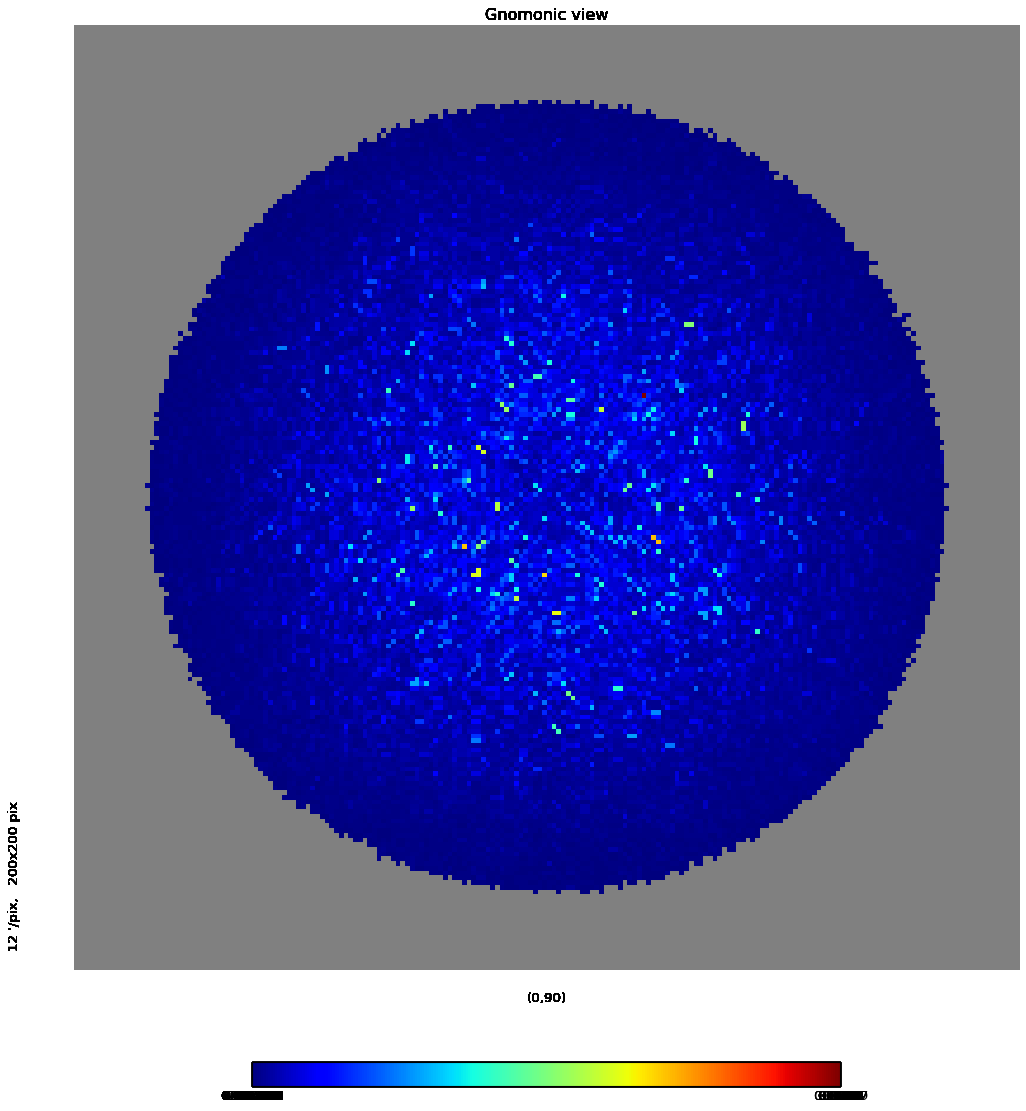

In [56]:
reso = 12
tols =['1e-4','5e-5']
lstyle = ['-', '--']

nsubvals = [1,2,3,4,5]
nbins=20
binsize=100/nbins
ally = np.zeros((nbins, len(tols),len(nsubvals),3))
ally_cov = np.zeros((nbins, len(tols), len(nsubvals),3))
ally_th = np.zeros((nbins, len(tols), len(nsubvals),3))

for k in xrange(len(tols)):
    sm = FitsArray('/Users/hamilton/Qubic/SpectroImager/seenmap_tol{}.fits'.format(tols[k]))
    seenmap = sm == 1
    for i in xrange(len(nsubvals)):
        print(k,i)
        for iqu in [0,1,2]:
            mm = FitsArray('/Users/hamilton/Qubic/SpectroImager/rms_maps_tol{}.fits'.format(tols[k]))
            x,y = get_profile(smallhpmap(mm[i,iqu,:],seenmap), reso, binsize=binsize)
            ally[:,k,i,iqu] = np.sqrt(y)
            
            mm = FitsArray('/Users/hamilton/Qubic/SpectroImager/rms_maps_cov_tol{}.fits'.format(tols[k]))
            x,y = get_profile(smallhpmap(mm[i,iqu,:],seenmap), reso, binsize=binsize)
            ally_cov[:,k,i,iqu] = np.sqrt(y)
            
            mm = FitsArray('/Users/hamilton/Qubic/SpectroImager/rmsth_maps_tol{}.fits'.format(tols[k]))
            x,y = get_profile(smallhpmap(mm[i,iqu,:],seenmap), reso, binsize=binsize)
            ally_th[:,k,i,iqu] = np.sqrt(y)




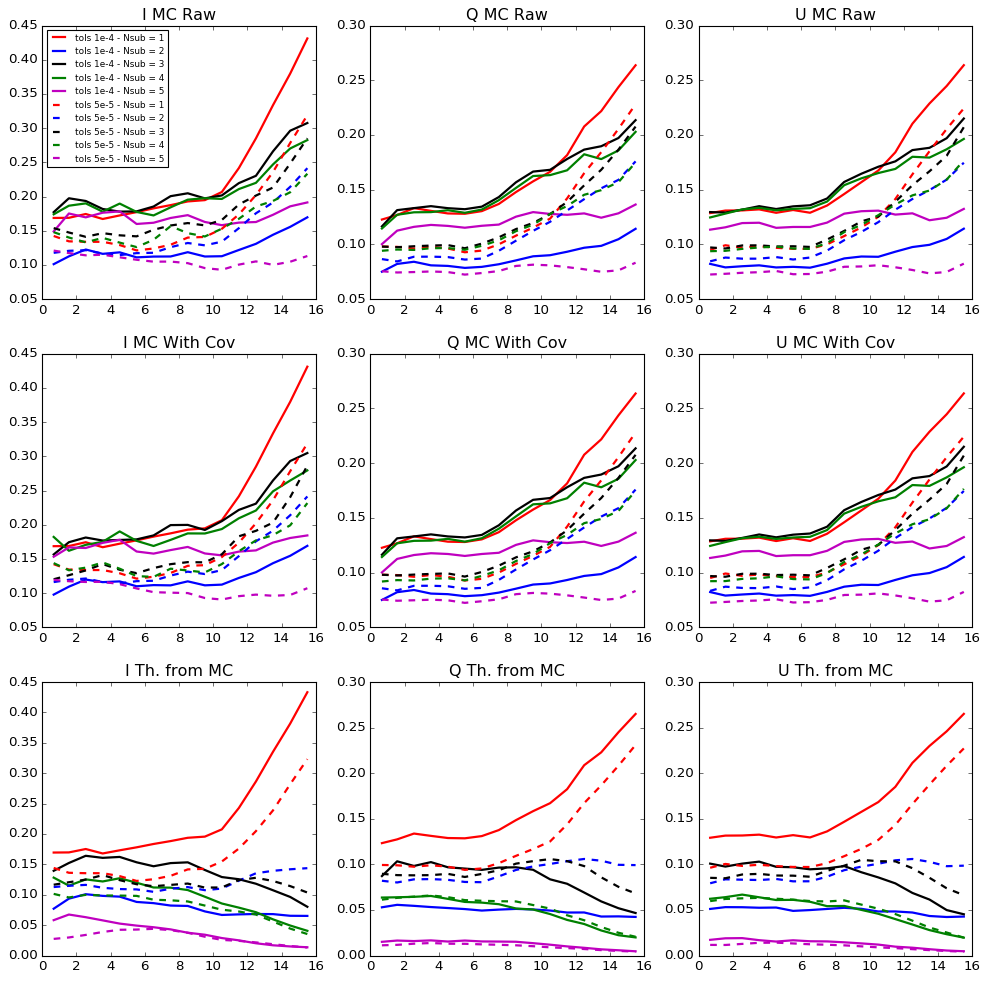

In [57]:
rc('figure',figsize=(15,15))
colors = ['r','b','k', 'g', 'm']
iqunames = ['I','Q','U']
for k in xrange(len(tols)):
    for i in xrange(len(nsubvals)):
        for iqu in [0,1,2]:
            subplot(3,3,iqu+1)
            plot(x, ally[:,k, i,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' MC Raw')
            subplot(3,3,iqu+1+3)
            plot(x, ally_cov[:,k,i,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' MC With Cov')
            subplot(3,3,iqu+1+6)
            plot(x, ally_th[:,k,i,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' Th. from MC')
subplot(3,3,1)
legend(fontsize=8, loc='upper left')

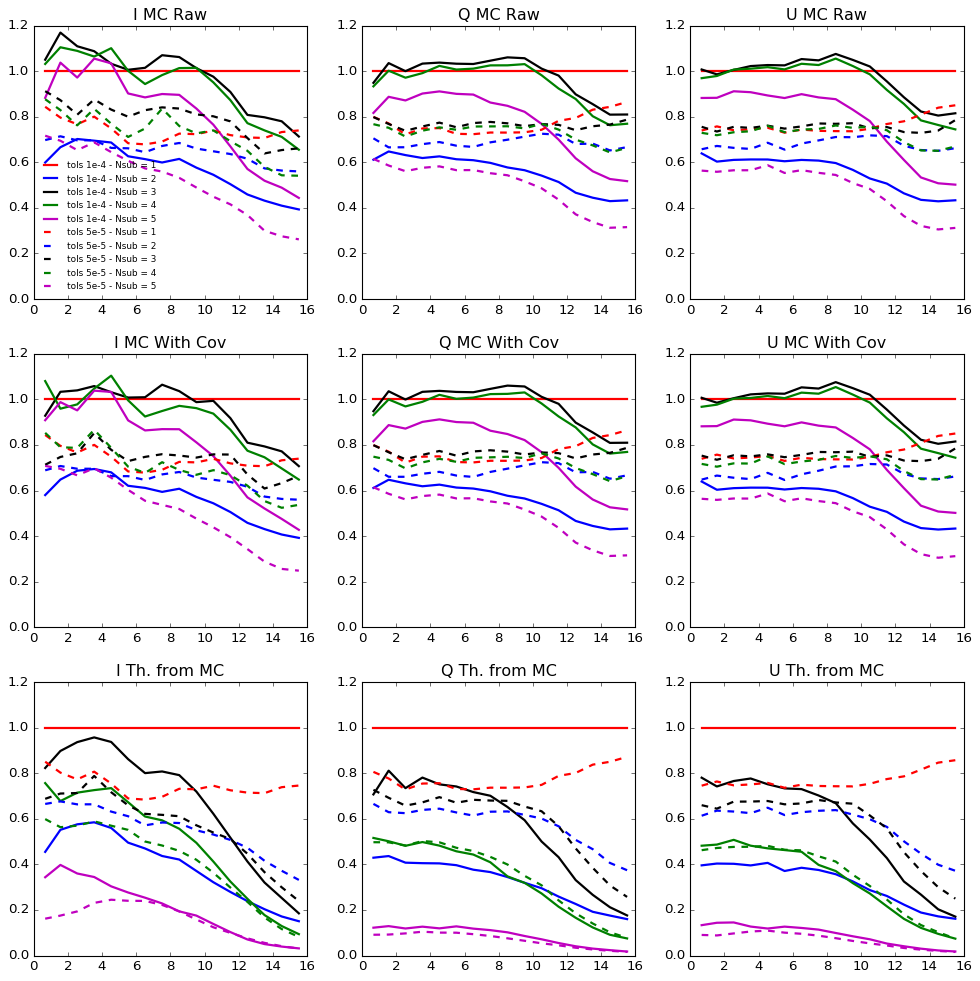

In [58]:
rc('figure',figsize=(15,15))
colors = ['r','b','k', 'g', 'm']
iqunames = ['I','Q','U']
for k in xrange(len(tols)):
    for i in xrange(len(nsubvals)):
        for iqu in [0,1,2]:
            subplot(3,3,iqu+1)
            plot(x, ally[:,k, i,iqu]/ally[:,0, 0,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' MC Raw')
            ylim(0,1.2)
            subplot(3,3,iqu+1+3)
            plot(x, ally_cov[:,k,i,iqu]/ally_cov[:,0, 0,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' MC With Cov')
            ylim(0,1.2)
            subplot(3,3,iqu+1+6)
            plot(x, ally_th[:,k,i,iqu]/ally_th[:,0, 0,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' Th. from MC')
            ylim(0,1.2)
subplot(3,3,1)
legend(fontsize=8, loc='lower left', frameon=False)

are there outliers in the MC explaining why 2 and 5 are better than the others than show consistent results ? Unlikely as the same seems to happen with 1e-4 and 5e-5... This is very surprising...

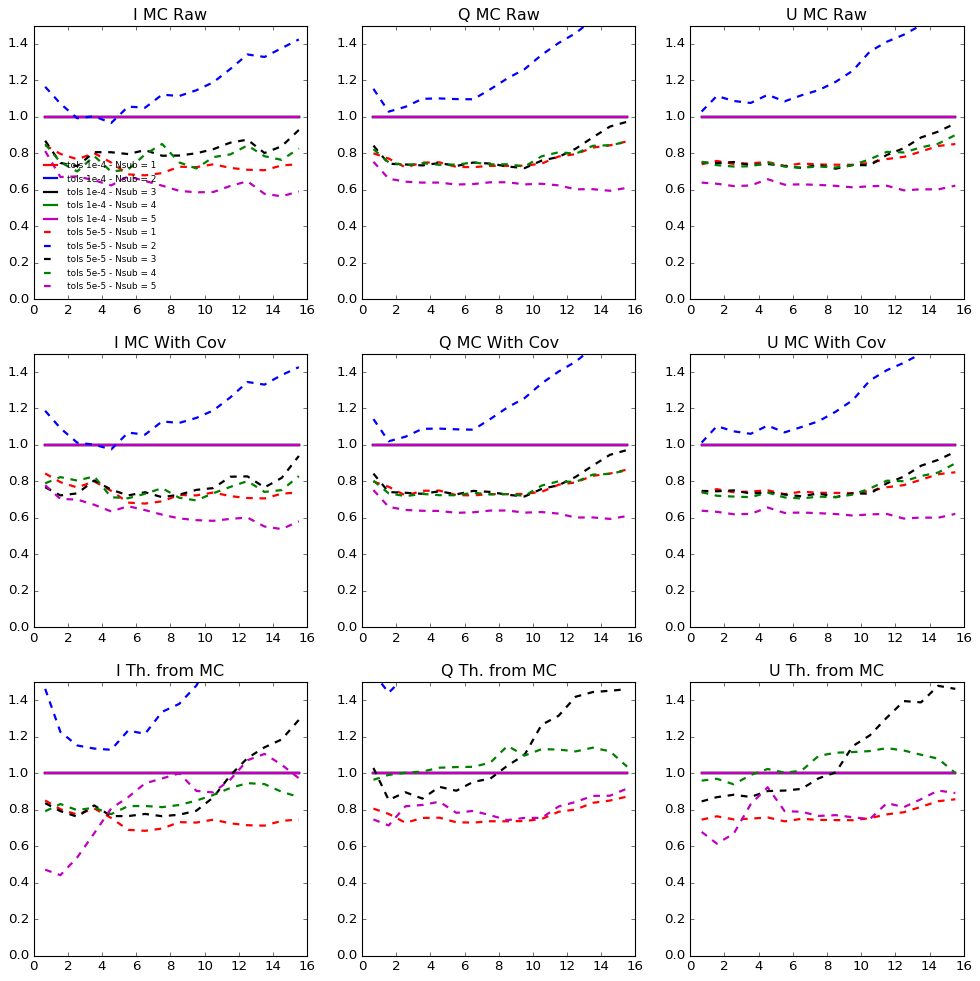

In [59]:
rc('figure',figsize=(15,15))
colors = ['r','b','k', 'g', 'm']
iqunames = ['I','Q','U']
for k in xrange(len(tols)):
    for i in xrange(len(nsubvals)):
        for iqu in [0,1,2]:
            subplot(3,3,iqu+1)
            plot(x, ally[:,k, i,iqu]/ally[:,0, i,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' MC Raw')
            ylim(0,1.5)
            subplot(3,3,iqu+1+3)
            plot(x, ally_cov[:,k,i,iqu]/ally_cov[:,0, i,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' MC With Cov')
            ylim(0,1.5)
            subplot(3,3,iqu+1+6)
            plot(x, ally_th[:,k,i,iqu]/ally_th[:,0, i,iqu], lw=2, ls = lstyle[k], color=colors[i], label='tols {} - Nsub = {}'.format(tols[k],i+1))
            if i==0: title(iqunames[iqu]+' Th. from MC')
            ylim(0,1.5)
subplot(3,3,1)
legend(fontsize=8, loc='lower left', frameon=False)

Le code utilisé est "noiseless=True" donc je ne comprends plus d'ou viennent les différences entre deux réalisations... Le pointage et le ciel sont aussi toujorus les mêmes. Peut être est-ce simplement une partie du bruit. Il faut donc comprendre ça !
Je pense que ce que l'on regarde ici n'est pas "vraiment" du bruit et c'est pour ça que ça scale bizarrement.

Il va donc falloir hélas refaire les simulations avec:
- des simus avec même CMB et même pointage
- des simus en varince le CMB, noiseless (mais totalement noiseless cette fois) pour étudier le biais. Pour ces dernieres il faudra vérifier que deux simus avec le même CMB donnent bien exactement la même chose, ce qui n'est pas le cas ici...